In [1]:
# import required packages
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib as mp
import statsmodels as ss

In [22]:
# Download BDEV.L Sports prices
BDEV=yf.download('BDEV.L',start='2019-01-02',end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [23]:
print (BDEV)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  458.000000  465.899994  453.600006  462.200012  423.468323   
2019-01-03  457.299988  473.399994  457.000000  464.299988  425.392303   
2019-01-04  466.700012  474.700012  466.700012  473.500000  433.821350   
2019-01-07  476.399994  482.299988  471.700012  477.000000  437.028046   
2019-01-08  477.799988  487.500000  473.100006  479.299988  439.135345   
...                ...         ...         ...         ...         ...   
2020-12-23  654.400024  677.799988  631.000000  676.000000  676.000000   
2020-12-24  687.799988  699.799988  683.400024  688.000000  688.000000   
2020-12-29  694.000000  704.599976  680.000000  681.599976  681.599976   
2020-12-30  676.000000  693.270020  675.599976  680.200012  680.200012   
2020-12-31  673.200012  678.799988  661.400024  670.000000  670.000000   

             Volume  
Date           

In [24]:
BDEV.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  458.000000  465.899994  453.600006  462.200012  423.468323   
2019-01-03  457.299988  473.399994  457.000000  464.299988  425.392303   
2019-01-04  466.700012  474.700012  466.700012  473.500000  433.821350   
2019-01-07  476.399994  482.299988  471.700012  477.000000  437.028046   
2019-01-08  477.799988  487.500000  473.100006  479.299988  439.135345   
...                ...         ...         ...         ...         ...   
2020-12-23  654.400024  677.799988  631.000000  676.000000  676.000000   
2020-12-24  687.799988  699.799988  683.400024  688.000000  688.000000   
2020-12-29  694.000000  704.599976  680.000000  681.599976  681.599976   
2020-12-30  676.000000  693.270020  675.599976  680.200012  680.200012   
2020-12-31  673.200012  678.799988  661.400024  670.000000  670.000000   

       

# Indexing

# Select a column, row, or cell By the names of columns and rows

In [25]:
# select a column
BDEV['Adj Close']

Date
2019-01-02    423.468323
2019-01-03    425.392303
2019-01-04    433.821350
2019-01-07    437.028046
2019-01-08    439.135345
                 ...    
2020-12-23    676.000000
2020-12-24    688.000000
2020-12-29    681.599976
2020-12-30    680.200012
2020-12-31    670.000000
Name: Adj Close, Length: 507, dtype: float64

In [26]:
# select a row
BDEV.loc['2019-01-02']


Open         4.580000e+02
High         4.659000e+02
Low          4.536000e+02
Close        4.622000e+02
Adj Close    4.234683e+02
Volume       3.619480e+06
Name: 2019-01-02 00:00:00, dtype: float64

In [27]:
# select a cell
BDEV['Adj Close']['2019-01-02']

423.46832275390625

#### By the numbers of columns and rows

In [41]:
# select a column
BDEV.iloc[:,4]

Date
2019-01-02    423.468323
2019-01-03    425.392303
2019-01-04    433.821350
2019-01-07    437.028046
2019-01-08    439.135345
                 ...    
2020-12-23    676.000000
2020-12-24    688.000000
2020-12-29    681.599976
2020-12-30    680.200012
2020-12-31    670.000000
Name: Adj Close, Length: 507, dtype: float64

In [42]:
# select a row
BDEV.iloc[0]

Open         4.580000e+02
High         4.659000e+02
Low          4.536000e+02
Close        4.622000e+02
Adj Close    4.234683e+02
Volume       3.619480e+06
Name: 2019-01-02 00:00:00, dtype: float64

In [43]:
# select a cell
BDEV.iloc[0,4]

423.46832275390625

### Define the training and test sets

In [44]:
# Training set
BDEVtraining = BDEV.iloc[0:487]

In [45]:
# Drop the columns we don't need
BDEVtraining = BDEVtraining.drop(columns=['Open','High','Low','Close','Volume'])


In [46]:
print (BDEVtraining)

             Adj Close
Date                  
2019-01-02  423.468323
2019-01-03  425.392303
2019-01-04  433.821350
2019-01-07  437.028046
2019-01-08  439.135345
...                ...
2020-11-25  636.200012
2020-11-26  629.000000
2020-11-27  629.000000
2020-11-30  620.000000
2020-12-01  655.799988

[487 rows x 1 columns]


In [47]:



# Test set
BDEVtest=BDEV.iloc[487:507]

# or BDEVtest=BDEV.iloc[-20:-1].append(BDEV.iloc[-1])

In [48]:
# Drop the columns we don't need
BDEVtest=BDEVtest.drop(columns=['Open','High','Low','Close','Volume'])

In [49]:
print (BDEVtest)

             Adj Close
Date                  
2020-12-02  648.799988
2020-12-03  659.200012
2020-12-04  653.599976
2020-12-07  631.000000
2020-12-08  626.000000
2020-12-09  630.799988
2020-12-10  598.599976
2020-12-11  583.400024
2020-12-14  605.599976
2020-12-15  621.200012
2020-12-16  650.000000
2020-12-17  650.000000
2020-12-18  650.000000
2020-12-21  636.400024
2020-12-22  649.000000
2020-12-23  676.000000
2020-12-24  688.000000
2020-12-29  681.599976
2020-12-30  680.200012
2020-12-31  670.000000


## Descriptive Analytics

### Calculate daily returns

The formula is: today's return = (today's price - yesterday's price)/yesterday's price

In [52]:
returns=(BDEVtraining['Adj Close']-BDEVtraining.shift(1)['Adj Close'])/BDEVtraining.shift(1)['Adj Close']

# BDEVtraining.shift(1) can shift all records down by one row.

In [53]:
BDEVtraining['Return']=returns

In [19]:
BDEVtraining

,Adj Close
Date,
2019-01-02,423.468323
2019-01-03,425.392303
2019-01-04,433.821350
2019-01-07,437.028046
2019-01-08,439.135345
...,...
2020-11-25,636.200012
2020-11-26,629.000000
2020-11-27,629.000000


In [54]:
# calculate daily returns of test set
BDEVtest['Return']=(BDEVtest['Adj Close']-BDEVtest.shift(1)['Adj Close'])/BDEVtest.shift(1)['Adj Close']
BDEVtest

,Adj Close,Return
Date,,
2020-12-02,648.799988,NaN
2020-12-03,659.200012,0.016030
2020-12-04,653.599976,-0.008495
2020-12-07,631.000000,-0.034578
2020-12-08,626.000000,-0.007924
2020-12-09,630.799988,0.007668
2020-12-10,598.599976,-0.051046
2020-12-11,583.400024,-0.025393
2020-12-14,605.599976,0.038053


In [55]:
BDEVtest.iloc[0,1]=(BDEVtest.iloc[0,0]-BDEVtraining.iloc[-1,0])/BDEVtraining.iloc[-1,0]
BDEVtest

,Adj Close,Return
Date,,
2020-12-02,648.799988,-0.010674
2020-12-03,659.200012,0.016030
2020-12-04,653.599976,-0.008495
2020-12-07,631.000000,-0.034578
2020-12-08,626.000000,-0.007924
2020-12-09,630.799988,0.007668
2020-12-10,598.599976,-0.051046
2020-12-11,583.400024,-0.025393
2020-12-14,605.599976,0.038053


Descriptive statistics

In [56]:
BDEVtraining.describe()

,Adj Close,Return
count,487.000000,486.000000
mean,567.257735,0.001342
std,89.836031,0.029828
min,349.453918,-0.140422
25%,513.627991,-0.010090
50%,545.562317,0.001023
75%,608.541840,0.012400
max,841.678955,0.164195


In [57]:
BDEVtraining.mean()

Adj Close    567.257735
Return         0.001342
dtype: float64

In [58]:
BDEVtraining.median()

Adj Close    545.562317
Return         0.001023
dtype: float64

In [59]:
#Sample variance
BDEVtraining.var()

Adj Close    8070.512516
Return          0.000890
dtype: float64

In [60]:
#Population variance, not required for your assignment
BDEVtraining.var(ddof=0)

Adj Close    8053.940622
Return          0.000888
dtype: float64

In [61]:
# Sample standard deviation
BDEVtraining.std()

Adj Close    89.836031
Return        0.029828
dtype: float64

In [62]:
# Population standard deviation, not required
BDEVtraining.std(ddof=0)

Adj Close    89.743750
Return        0.029798
dtype: float64

In [63]:
# Return to risk = mean of returns/std of returns
BDEVtraining['Return'].mean()/BDEVtraining['Return'].std()

0.0449907308836208

In [64]:
BDEVtraining.describe()

,Adj Close,Return
count,487.000000,486.000000
mean,567.257735,0.001342
std,89.836031,0.029828
min,349.453918,-0.140422
25%,513.627991,-0.010090
50%,545.562317,0.001023
75%,608.541840,0.012400
max,841.678955,0.164195


In [67]:
BDEVtraining

,Adj Close,Return
Date,,
2019-01-02,423.468323,NaN
2019-01-03,425.392303,0.004543
2019-01-04,433.821350,0.019815
2019-01-07,437.028046,0.007392
2019-01-08,439.135345,0.004822
...,...,...
2020-11-25,636.200012,-0.013337
2020-11-26,629.000000,-0.011317
2020-11-27,629.000000,0.000000


### Histogram, Boxplot and Line charts

array([[<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Return'}>]], dtype=object)

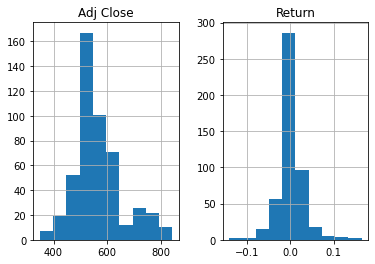

In [65]:
BDEVtraining.hist()

array([[<AxesSubplot:title={'center':'Return'}>]], dtype=object)

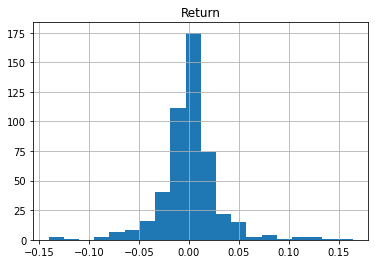

In [66]:
BDEVtraining.hist(column='Return',bins=20)

(array([  2.,   1.,   0.,   2.,   7.,   8.,  16.,  40., 111., 175.,  74.,
         22.,  15.,   2.,   4.,   1.,   2.,   2.,   1.,   1.]),
 array([-0.14042164, -0.12519083, -0.10996002, -0.0947292 , -0.07949839,
        -0.06426758, -0.04903676, -0.03380595, -0.01857514, -0.00334433,
         0.01188649,  0.0271173 ,  0.04234811,  0.05757893,  0.07280974,
         0.08804055,  0.10327137,  0.11850218,  0.13373299,  0.14896381,
         0.16419462]),
 <BarContainer object of 20 artists>)

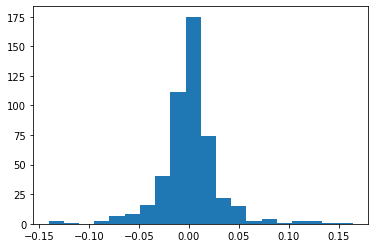

In [68]:
mp.pyplot.hist(BDEVtraining['Return'],bins=20)

Text(0.0012270991024888663, 14, 'Median: 0.0010')

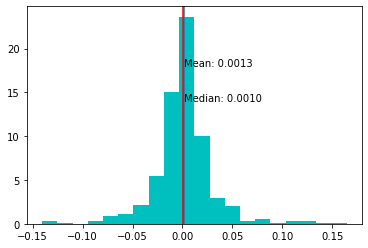

In [70]:
htg=mp.pyplot.hist(BDEVtraining['Return'],bins=20,density=True,cumulative=False,histtype='bar',color='c')
mp.pyplot.axvline(BDEVtraining['Return'].mean())
mp.pyplot.text(BDEVtraining['Return'].mean()*1.1,18,'Mean: {:,.4f}'.format(BDEVtraining['Return'].mean()))
mp.pyplot.axvline(BDEVtraining['Return'].median(),color='r')
mp.pyplot.text(BDEVtraining['Return'].median()*1.2,14,'Median: {:,.4f}'.format(BDEVtraining['Return'].median()))

Text(545.5623168945312, 40, 'Median: 545.5623')

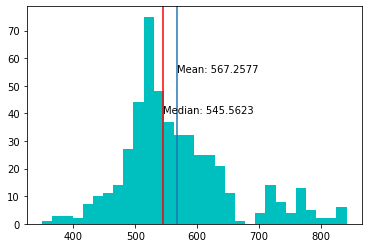

In [74]:
htg=mp.pyplot.hist(BDEVtraining['Adj Close'],bins=30,density=False,cumulative=False,histtype='bar',color='c')
mp.pyplot.axvline(BDEVtraining['Adj Close'].mean())
mp.pyplot.text(BDEVtraining['Adj Close'].mean(),55,'Mean: {:,.4f}'.format(BDEVtraining['Adj Close'].mean()))
mp.pyplot.axvline(BDEVtraining['Adj Close'].median(),color='r')
mp.pyplot.text(BDEVtraining['Adj Close'].median(),40,'Median: {:,.4f}'.format(BDEVtraining['Adj Close'].median()))

Decriptive statistics with box plot

<AxesSubplot:>

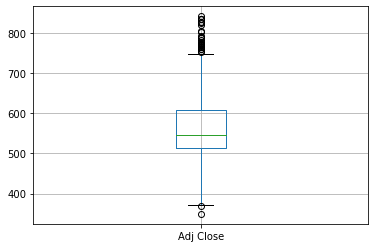

In [75]:
BDEVtraining.boxplot(column='Adj Close')

In [76]:
#RESERVE FOR COMMENT

Text(0, 0.5, 'BDEV price')

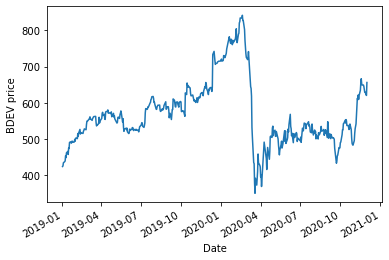

In [78]:
priceline=BDEVtraining.plot.line(y='Adj Close',legend=False)
priceline.set_xlabel("Date")
priceline.set_ylabel("BDEV price")